<a href="https://colab.research.google.com/github/muroo123/pandas/blob/main/pandas_section4_%EB%8D%B0%EC%9D%B4%ED%83%80_%EB%88%84%EB%9D%BD_%EC%A4%91%EB%B3%B5%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

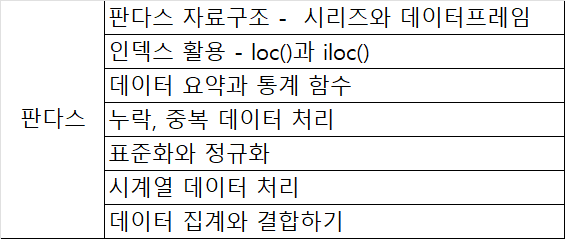

- 판다스 API : https://pandas.pydata.org/pandas-docs/stable/reference/index.html
- 넘파이 API : https://numpy.org/doc/stable/reference/index.html
- Python for Data Analysis(3판) : https://wesmckinney.com/book/

In [1]:
# git 연결
!git clone https://github.com/muroo123/data.git

Cloning into 'data'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 34.35 KiB | 1.81 MiB/s, done.


# 누락 데이터 처리 #

## 타이타닉 데이타
 - https://www.kaggle.com/competitions/titanic

## 칼럼 설명
- PassengerId(승객ID)
- Survived(생존여부):	 0 사망자, 1 생존자
- Pclass(객실등급)	 1 = 1등급, 2 = 2등급, 3 = 3등급
- Name(이름)
- Sex(성별)
- Age(나이)
- SibSp(함께 탑승한 형제자매 및 배우자 수)
- Parch(함께 탑승한 부모 및 자녀 수)
- Ticket(티켓번호)
- Fare(요금)
- Cabin(객실번호)
- Embarked(탑승지)	C = Cherbourg, Q = Queenstown, S = Southampton


In [2]:
# csv 파일로 DataFrame을 만들기
import pandas as pd

df = pd.read_csv("/content/data/titanic.csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 데이터 구조 확인
- DataFrame.head(n=5) : 처음부터 n개 행의 데이터 가져오기
- DataFrame.tail(n=5) : 마지막 n개 행의 데이터 가져오기
- DataFrame.info(memory_usage='deep') : 데이터 프레임의 row 개수 및 각 column의 Non null, dtype 정보 및 메모리 사용량을 확인함
- DataFrame.shape : 데이터 프레임의 행, 열의 수를 tuple로 반환
- DataFrame.dtypes: float64,int64,object,datetime64 등 datatype을 반환
- datatype 설명 :    

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#통계값 확인하기
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 결측치 확인/처리

결측치는 값이 없음을 나타냄
- NaN, NaT, None 등으로 표기되며, NA Value, Missing Value 라고 함

결측치 확인
   - DataFrame.isna() : 결측치에 대해 True, 아니면 False
   - DataFrame.isnull() : DataFrame.isna()와 동일함
   - DataFrame.notna() : 결측치가 아닌 것에 대해 True, 결측치면 False
   - DataFrame.notnull() : DataFrame.isnull()과 동일함
   - Series에도 결측치 확인을 위한 isna() ~ notnull()의 메서드 있음

DataFrame.isna().sum() : 결측치에 대해 컬럼별 개수

DataFrame.isna().sum().sum() : 전체 결측치의 개수

In [52]:
# 각 컬럼별 결측치 여부
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [53]:
# df 각 컬럼별 결측치의 개수를 확인합니다.
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
# df 각 컬럼별 결측치의 개수를 확인합니다.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
# Age 칼럼 결측치 조회
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [56]:
# Embarked 칼럼 결측치 조회
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Series.value_counts() : 데이터 별 개수를 Series로 반환
- NA Value가 있다면 불포함

In [12]:
# Embarked 칼럼에 대해 값별 개수를 구함
df['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
# # Embarked 칼럼에 대해 값별 개수를 구함
# dropna=False 옵션으로 NA Value 포함
df['Embarked'].value_counts(dropna=False)


Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [18]:
# 전체 결측치의 개수를 하나의 정수로 확인합니다.
# Age 177 + Cabin 687 + Embarked  2
df.isna().sum().sum()

866

## 결측치 채우기
- DataFrame.fillna(값) : 결측치를 특정 값으로 채움
    - 연속형 데이터 : 0으로 채우기, 평균값으로 채우기, 범주별 평균값 채우기 등
    - 범주형 데이터 : 다른 범주로 만들어 채우기

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
# Age2 추가 : 'Age'에 대해 결측치를 0.0으로 채우기
df['Age2'] = df['Age'].fillna(0.0)

In [58]:
# Age3 추가 : 'Age'에 대해 결측치를 평균으로 채우기
mean_age = df['Age'].mean()
print(mean_age)
df['Age3'] = df['Age'].fillna(mean_age)

#df['Age3'] = df['Age'].fillna(df['Age'].mean())

29.69911764705882


In [59]:
# Embarked2 추가 : 'Embarked2'에 대해 결측치를 0.0으로 채우기
# backfill, bfill :  결측값을 바로 아래 값과 동일하게 변경
# ffill :  결측값을 바로 위 값과 동일하게 변경
df['Embarked2'] = df['Embarked'].fillna(method ='backfill')

In [60]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age2             0
Age3             0
Embarked2        0
dtype: int64

In [65]:
# Embarked 칼럼 829행의 NaN 데이터 출력
df['Embarked'][825:831]


825      Q
826      S
827      C
828      Q
829    NaN
830      C
Name: Embarked, dtype: object

In [62]:
# Embarked 칼럼의 NaN값을 승선지 중에서 가장 많이 출현한 값으로 치환하기
most_freq = df['Embarked'].value_counts(dropna=True).idxmax()
print(most_freq)

df['Embarked3'] = df['Embarked'].fillna(most_freq)


S


In [66]:
# Embarked3 열 829행의 NaN 데이터 출력 (NaN 값이 most_freq 값으로 대체)
df[825:831]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2,Age3,Embarked2,Embarked3
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q,0.0,29.699118,Q,Q
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,0.0,29.699118,S,S
827,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C,1.0,1.000000,C,C
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q,0.0,29.699118,Q,Q
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN,62.0,62.000000,C,S
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,15.0,15.000000,C,C


## 결측치 제거

DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
- 결측치 제거에 사용되는 메서드
- how='any' : 결측치가 하나라도 포함된 행 삭제
- how='all' : 모든 데이터가 결측치인 행 삭제
- axis=1 : 컬럼에 대해 동작
- thresh=숫자 : 숫자 이상의 데이터를 가진 행은 삭제 안함
- subset=[컬럼이름1, ...] : subset으로 지정된 컬럼만 사용하여 삭제 대상 검색

In [16]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - Age 열(891개 중 177개의 NaN 값)
df_age = df.dropna(subset=['Age'], how='any', axis=0)
print(len(df_age))

714


In [36]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [17]:
# NaN 값이 500개 이상인 열을 모두 삭제 - Cabin 열(891개 중 687개의 NaN 값)
df_thresh = df.dropna(axis=1, thresh=500)
print(df_thresh.columns)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [38]:
df_thresh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## 중복 데이터 확인 ##

In [69]:
# 중복 데이터를 갖는 데이터프레임 만들기
df2 = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
df2

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [70]:
# 데이터프레임 전체 행 데이터 중에서 중복값 찾기
df_dup = df2.duplicated()
df_dup

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [71]:
# 데이터프레임의 특정 열 데이터에서 중복값 찾기
col_dup = df2['c2'].duplicated()
col_dup

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool

## 중복 데이터 제거

In [72]:
# 데이터프레임에서 중복 행을 제거
df3 = df2.drop_duplicates()
df3


,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [73]:
# c2, c3열을 기준으로 중복 행을 제거
df4 = df2.drop_duplicates(subset=['c2', 'c3'])
df4


,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2


그룹별 통계치 구하기(group by) : 범주형 데이터 그룹화
- DataFrame.groupby(그룹명).적용할통계함수()
    - DataFrame의 함수 적용 가능 컬럼들에 대해 그룹별 통계치를 구함
    - 통계함수에는 sum, mean, std, var, min, max, count, quantile 등이 있음
    - groupby()는 다음과 같은 내장 function을 사용해서 group 통계를 볼 수 있습니다.
        - count()
        - sum()
        - mean() : 평균
        - median() : 중앙값
        - var() : 분산
        - std() : 표준편차
        - min()/max()
    - 주의사항 : sum(), mean, var(), std, min/max() 등은 그룹의 산술통계를 의미하기 때문에 숫자형 데이터 컬럼에만 적용됩니다.
- DataFrame.groupby(그룹명)[컬럼].적용할통계함수() : Series
- DataFrame.groupby(그룹명)[[컬럼1, 컬럼2, ...]].적용할통계함수() : DataFrame

## 칼럼 설명
- PassengerId(승객ID)
- Survived(생존여부):	 0 사망자, 1 생존자
- Pclass(객실등급)	 1 = 1등급, 2 = 2등급, 3 = 3등급
- Name(이름)
- Sex(성별)
- Age(나이)
- SibSp(함께 탑승한 형제자매 및 배우자 수)
- Parch(함께 탑승한 부모 및 자녀 수)
- Ticket(티켓번호)
- Fare(요금)
- Cabin(객실번호)
- Embarked(탑승지)	C = Cherbourg, Q = Queenstown, S = Southampton

In [7]:
#생존자, 사망자 구하기
df.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [8]:
#생존자, 사망자 구하기
df.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [11]:
# 생존자/사망자 남녀 몇명인지 구하기
df.groupby(['Survived','Sex']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Survived Sex                      
0        female      6        81  
         male       62       468  
1        female     91       231  
         male       45       109

In [14]:
# 생존자/사망자 남녀 몇명인지 구하기
df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [6]:
#객실 등급별 개수
df.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [16]:
#객실 등급별 요금 평균값
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [15]:
#객실 등급별 요금 중앙값
df.groupby('Pclass')['Fare'].median()

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [17]:
#객실 등급별 나이 중앙값
df.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [21]:
# 생존자 남녀 몇명인지 구하기
df[df['Survived'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [22]:
# 생존자 남녀 몇명인지 구하기
df[df['Survived'] == 1].groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,233,233,233,233,197,233,233,233,233,91,231
male,109,109,109,109,93,109,109,109,109,45,109


In [27]:
# 생존자의 성별, 객실 등급별 몇명인지 구하기
df[df['Survived'] == 1].groupby(['Sex','Pclass']).count()

PassengerId  Survived  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Pclass                                                                 
female 1                91        91    91   82     91     91      91    91   
       2                70        70    70   68     70     70      70    70   
       3                72        72    72   47     72     72      72    72   
male   1                45        45    45   40     45     45      45    45   
       2                17        17    17   15     17     17      17    17   
       3                47        47    47   38     47     47      47    47   

               Cabin  Embarked  
Sex    Pclass                   
female 1          78        89  
       2           9        70  
       3           4        72  
male   1          39        45  
       2           4        17  
       3           2        47

In [23]:
# 생존자 남녀 나이 중앙값 구하기
df[df['Survived'] == 1].groupby('Sex')['Age'].median()

Sex
female    28.0
male      28.0
Name: Age, dtype: float64

In [24]:
# 생존자 남녀 최연소 구하기
df[df['Survived'] == 1].groupby('Sex')['Age'].min()

Sex
female    0.75
male      0.42
Name: Age, dtype: float64

In [25]:
# 생존자 남녀 최연장자 구하기
df[df['Survived'] == 1].groupby('Sex')['Age'].max()

Sex
female    63.0
male      80.0
Name: Age, dtype: float64

In [31]:
# 생존자/사망자 별 남녀 몇명인지
df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [33]:
# 여자 중 생존자/사망자, 객실등급별 몇명인지
df[df['Sex'] == 'female'].groupby(['Survived','Pclass'])['Survived'].count()

Survived  Pclass
0         1          3
          2          6
          3         72
1         1         91
          2         70
          3         72
Name: Survived, dtype: int64